In [1]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


In [2]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding
from collections import Counter
import time
import progressbar as pb
from tqdm import tqdm
import os
import shutil
from empyrical import sortino_ratio, calmar_ratio, omega_ratio
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy
from stable_baselines.common.vec_env import SubprocVecEnv, VecEnv, VecEnvWrapper
from stable_baselines import A2C, PPO2
from stable_baselines.common.vec_env import DummyVecEnv

from trading_env import TradingEnv

In [3]:
# load the market data
input_source = np.load(open('data_spy.npy','rb'))
to_predict = np.load(open('data_spy_targets.npy','rb'))

to_predict = to_predict[3,:].reshape(-1)

input_source = input_source.T

In [4]:
is_orig = np.copy(input_source)
cp = int(0.8*len(input_source))
test_input_source = input_source[cp:, :]
test_to_predict = to_predict[cp:]
input_source = input_source[0:cp, :]
to_predict = to_predict[0:cp]

In [5]:
bars_per_episode = 10000
winlen = 1
traded_amt = 10000
initial_balance = 10000
commission = 0
slippage = 0.0

In [6]:
# multiprocess environment
#n_cpu = 16
#env = SubprocVecEnv([lambda: TradingEnv() for i in range(n_cpu)])
env = TradingEnv(input_source, to_predict,
                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt, initial_balance=initial_balance,
                 commission=commission, slippage=slippage
                 )
env = DummyVecEnv([lambda: env])

t = 0
#[shutil.rmtree('/home/peter/tblog/'+x) for x in os.listdir('/home/peter/tblog/') if x]
model = A2C(MlpLstmPolicy, env, verbose=1, tensorboard_log='/home/peter/tblog')
try:
    model.learn(total_timesteps=1_000_000)
    model.save("a2c_trading")
except KeyboardInterrupt:
    pass

W0706 06:54:12.599444 140719580555072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0706 06:54:12.600379 140719580555072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0706 06:54:12.607150 140719580555072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/policies.py:114: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0706 06:54:12.607854 140719580555072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/input.py:25: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 06:54:12.610705 140719580555072 deprecation.py:323] From /u

----------------------------------
| explained_variance | -1.38e+03 |
| fps                | 10        |
| nupdates           | 1         |
| policy_entropy     | 1.39      |
| total_timesteps    | 5         |
| value_loss         | 0.00749   |
----------------------------------
---------------------------------
| explained_variance | 2.68e-06 |
| fps                | 371      |
| nupdates           | 100      |
| policy_entropy     | 1.39     |
| total_timesteps    | 500      |
| value_loss         | 1.33e+09 |
---------------------------------
----------------------------------
| explained_variance | -4.28e-05 |
| fps                | 484       |
| nupdates           | 200       |
| policy_entropy     | 1.39      |
| total_timesteps    | 1000      |
| value_loss         | 3.85e+06  |
----------------------------------
----------------------------------
| explained_variance | -7.15e-06 |
| fps                | 543       |
| nupdates           | 300       |
| policy_entropy     | 1.39 

---------------------------------
| explained_variance | -0.00054 |
| fps                | 621      |
| nupdates           | 3000     |
| policy_entropy     | 1.27     |
| total_timesteps    | 15000    |
| value_loss         | 5.25e+06 |
---------------------------------
---------------------------------
| explained_variance | 6.75e-05 |
| fps                | 624      |
| nupdates           | 3100     |
| policy_entropy     | 1.02     |
| total_timesteps    | 15500    |
| value_loss         | 1.13e+07 |
---------------------------------
---------------------------------
| explained_variance | -0.00892 |
| fps                | 628      |
| nupdates           | 3200     |
| policy_entropy     | 0.988    |
| total_timesteps    | 16000    |
| value_loss         | 2.78e+08 |
---------------------------------
----------------------------------
| explained_variance | -4.89e-06 |
| fps                | 629       |
| nupdates           | 3300      |
| policy_entropy     | 0.00195   |
| total_t

---------------------------------
| explained_variance | 0        |
| fps                | 658      |
| nupdates           | 6000     |
| policy_entropy     | 1.56e-05 |
| total_timesteps    | 30000    |
| value_loss         | 7.43e+13 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 659      |
| nupdates           | 6100     |
| policy_entropy     | 1.56e-05 |
| total_timesteps    | 30500    |
| value_loss         | 2.51e+14 |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 661       |
| nupdates           | 6200      |
| policy_entropy     | 1.56e-05  |
| total_timesteps    | 31000     |
| value_loss         | 5.49e+14  |
----------------------------------
---------------------------------
| explained_variance | 5.96e-08 |
| fps                | 661      |
| nupdates           | 6300     |
| policy_entropy     | 1.55e-05 |
| tota

---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 661      |
| nupdates           | 9000     |
| policy_entropy     | 1.49e-05 |
| total_timesteps    | 45000    |
| value_loss         | 3.87e+10 |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 661       |
| nupdates           | 9100      |
| policy_entropy     | 1.49e-05  |
| total_timesteps    | 45500     |
| value_loss         | 4.52e+11  |
----------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 662       |
| nupdates           | 9200      |
| policy_entropy     | 1.49e-05  |
| total_timesteps    | 46000     |
| value_loss         | 7.43e+11  |
----------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 662       |
| nupdates           | 9300      |
| policy_entropy     | 1.49e

----------------------------------
| explained_variance | -3.58e-07 |
| fps                | 678       |
| nupdates           | 12000     |
| policy_entropy     | 6.19e-05  |
| total_timesteps    | 60000     |
| value_loss         | 7.23e+09  |
----------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 678       |
| nupdates           | 12100     |
| policy_entropy     | 6.18e-05  |
| total_timesteps    | 60500     |
| value_loss         | 8.74e+11  |
----------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 678       |
| nupdates           | 12200     |
| policy_entropy     | 6.21e-05  |
| total_timesteps    | 61000     |
| value_loss         | 1.07e+10  |
----------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 678      |
| nupdates           | 12300    |
| policy_entropy     | 6

----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 682       |
| nupdates           | 15000     |
| policy_entropy     | 5.92e-05  |
| total_timesteps    | 75000     |
| value_loss         | 8.25e+12  |
----------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 682      |
| nupdates           | 15100    |
| policy_entropy     | 5.9e-05  |
| total_timesteps    | 75500    |
| value_loss         | 1.12e+13 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 682      |
| nupdates           | 15200    |
| policy_entropy     | 5.89e-05 |
| total_timesteps    | 76000    |
| value_loss         | 1.25e+13 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 682      |
| nupdates           | 15300    |
| policy_entropy     | 5.87e-05 |
| tota

---------------------------------
| explained_variance | 0        |
| fps                | 690      |
| nupdates           | 18000    |
| policy_entropy     | 5.47e-05 |
| total_timesteps    | 90000    |
| value_loss         | 1.79e+14 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 690      |
| nupdates           | 18100    |
| policy_entropy     | 5.46e-05 |
| total_timesteps    | 90500    |
| value_loss         | 1.14e+14 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 690      |
| nupdates           | 18200    |
| policy_entropy     | 5.44e-05 |
| total_timesteps    | 91000    |
| value_loss         | 4.31e+14 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 689      |
| nupdates           | 18300    |
| policy_entropy     | 5.43e-05 |
| total_timest

---------------------------------
| explained_variance | 0        |
| fps                | 696      |
| nupdates           | 21000    |
| policy_entropy     | 5.2e-05  |
| total_timesteps    | 105000   |
| value_loss         | 6.34e+11 |
---------------------------------
---------------------------------
| explained_variance | 5.96e-08 |
| fps                | 696      |
| nupdates           | 21100    |
| policy_entropy     | 5.2e-05  |
| total_timesteps    | 105500   |
| value_loss         | 1.16e+12 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 697      |
| nupdates           | 21200    |
| policy_entropy     | 5.19e-05 |
| total_timesteps    | 106000   |
| value_loss         | 7.07e+12 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 697      |
| nupdates           | 21300    |
| policy_entropy     | 5.18e-05 |
| total_timest

---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 700      |
| nupdates           | 24000    |
| policy_entropy     | 4.93e-05 |
| total_timesteps    | 120000   |
| value_loss         | 3.58e+13 |
---------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 700       |
| nupdates           | 24100     |
| policy_entropy     | 4.92e-05  |
| total_timesteps    | 120500    |
| value_loss         | 9.63e+13  |
----------------------------------
---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 700      |
| nupdates           | 24200    |
| policy_entropy     | 4.91e-05 |
| total_timesteps    | 121000   |
| value_loss         | 1.66e+14 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 699      |
| nupdates           | 24300    |
| policy_entropy     | 4.9e-05  |
| tota

  0%|          | 0/1000 [00:00<?, ?it/s]


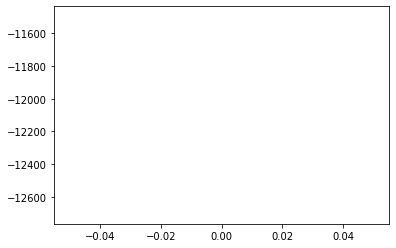

In [7]:
# visualize the behavior for one random episode
bars_per_episode = 1000

env = TradingEnv(test_input_source, test_to_predict,
                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt, initial_balance=initial_balance,
                 commission=commission, slippage=slippage
                 )
env = DummyVecEnv([lambda: env])


nstate = model.initial_state  # get the initial state vector for the reccurent network
#dones = np.zeros(nstate.shape[0])  # set all environment to not done
nstate=None

observation = env.envs[0].reset()#env.reset()
done = False
navs = []
acts = []
for i in tqdm(range(bars_per_episode)):
    action, nstate = model.predict([observation], state=nstate)
    acts.append(action)
    observation, reward, done, info = env.envs[0].step(action)#env.step(action)
    if done:
        break
    navs.append(env.get_attr('balance')[0])


kl = []
t = 0
for n in np.diff(np.vstack(navs).reshape(-1)):
    t = t + n
    kl.append(t)
plot(kl);

In [8]:
# calculate the likelihood of success for any given episode
try:
    l = 2500

    krl = []
    p = pb.ProgressBar(max_value=l)
    for i in range(l):
        p.update(i)
        observation = env.envs[0].reset()
        done = False
        navs = []
        for i in (range(bars_per_episode)):
            action, nstate = model.predict([observation], state=nstate)
            acts.append(action)
            observation, reward, done, info = env.envs[0].step(action)#env.step(action)
            navs.append(env.get_attr('balance')[0])
        krl.append(sum(navs))
    p.finish()
except KeyboardInterrupt:
    pass

krl = np.array(krl)
print('Profit likelihood: %3.3f%%' % (100*(sum(krl > 0) / len(krl))))

  0% (9 of 2500) |                       | Elapsed Time: 0:00:05 ETA:   0:24:32

Profit likelihood: 11.111%


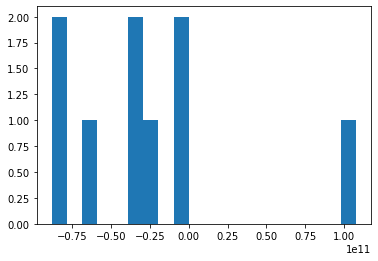

In [9]:
hist(krl, 20);